<a href="https://colab.research.google.com/github/al00pes/MVP_Analise_de_dados_PUC/blob/main/MVP_sprint_Analise_de_dados_e_boas_praticas_PUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


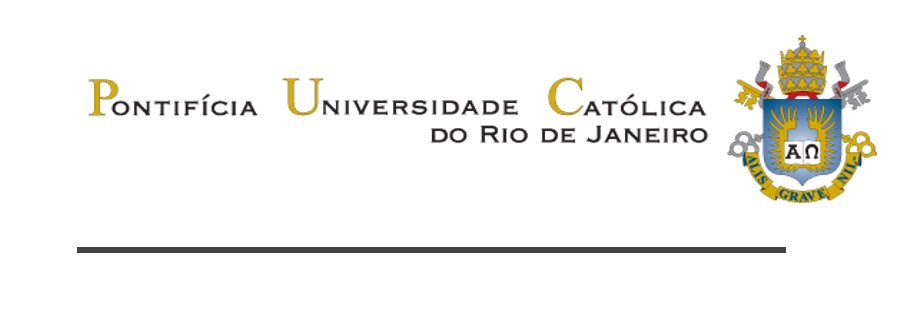

#MVP SPrint : Análise de Dados e Boas Práticas

#Aluno : Arthur F.F.Lopes

# 1. Definição do Problema

O dataset escolhido contém dados de um empresa de logística,
onde possui informações que detalharei abaixo.

Vou tentar entender quais informações insights posso obter dos dados para apresentar a diretoria em um momento atual que a empresa passa de expansão e crescimento interno.

O dataset contém 18 colunas e 355861 linhas, as colunas são:

- Número de pedido -> Identificação do pacotes
- Franqueado -> Local que a galpão está vinculado
- Responsável pela entrega -> O motorista que realiza a entrega
- PDD de Entrega -> Local de saída dos pacotes
- Horário da entrega -> Data e hora da entrega do motorista para o cliente final
- Destino -> Cidade da Entrega
- Tipo de item -> Especificação do produto
- Tipo de Produto -> Apenas informado com duas letras
- Valor mercadoria -> O valor do produto que será entregue
- CEP destino -> O CEP do destinario ( Cliente)
- Endereço detalhado do destinatário -> Nome da rua e o numero da residencia
- Tempo de entrega -> O Tempo que demorou da retirado do galpão até a entrega final
- Tempo de aprovação - > Horário da aprovação
- Tempo de atualização -> Tempo da sincronização do pacotes com o sistema
- Modo de entrega -> AINDA NÃO SEI
- Tempo de criação - > Horário de criação do pacote no sistema

#2: Importação das bibliotecas necessárias


In [125]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import missingno as ms # tratamento de missing
#Construição de gráficos
import matplotlib.pyplot as plt
import matplotlib as mpl
#essa biblioteca não está mais ativa
#from brazilcep import get_address_from_cep, exceptions, WebService
import pandas as pd
import numpy as np
import time
import requests
import locale

#2. Carregamento dos dados

In [2]:
pacotes_outubro = pd.read_csv('https://raw.githubusercontent.com/al00pes/MVP_Analise_de_dados_PUC/main/outubro01-15-2023.csv',delimiter=';')
#Exibir os dados carregador
pacotes_outubro.head()

,Número de pedido JMS,Franqueado,Base de entrega,Responsável pela entrega,Marca de assinatura,PDD de Entrega,Horário da entrega,Destino,Tipo de item,Tipo de Produto,Valor Mercadoria,CEP destino,Endereço detalhado do destinatário,Tempo de entrega,Tempo de aprovação,Tempo de atualização,Modo de entrega,Tempo de criação
0,888000259443753-000,NP RIO 02,CD RIO 004,CARLOS EDUARDO SOARES DA SILVA,Recebimento com assinatura normal,CD RIO 004,2023-10-15 18:48:53,Rio de Janeiro,Fragile Items,EZ,"476,9",23071570,"Rua Gutman BichoRua Gutman Bicho, 72, Fundos",2023-10-15 10:59:16,NaN,2023-10-15 18:52:03,Delivery3,2023-10-15 11:03:00
1,888000260356793-000,NP RIO 02,CD RIO 008,RAFAEL SANTOS PINTO,Recebimento com assinatura normal,CD RIO 008,2023-10-15 13:36:15,Rio de Janeiro,Roupa,EZ,"4,6",20740380,.Rua Torres de Oliveira 235,2023-10-15 10:56:04,NaN,2023-10-15 13:40:02,Delivery,2023-10-15 11:00:00
2,888000269117351-000,NP RIO 02,CD RIO 004,CAMILA AUGUSTO DE OLIVEIRA RODRIGUES,Recebimento com assinatura normal,CD RIO 004,2023-10-15 17:09:57,Rio de Janeiro,Fragile Items,EZ,"114,8",21810260,"Rua Simão CristinoRua Simão Cristino, 461, Casa 3",2023-10-15 10:56:28,NaN,2023-10-15 17:14:04,Delivery,2023-10-15 11:00:00
3,888000269896511-000,NP RIO 02,CD RIO 008,RAFAEL SANTOS PINTO,Recebimento com assinatura normal,CD RIO 008,2023-10-15 13:48:37,Rio de Janeiro,Roupa,EZ,"32,5",20740323,.Rua clarimundo de melo 446 bl1 apt 603,2023-10-15 11:00:16,NaN,2023-10-15 13:52:03,Delivery,2023-10-15 11:04:00
4,888000272767315-000,NP RIO 02,CD RIO 004,EVERTON NOLASCO DA SILVA,Recebimento com assinatura normal,CD RIO 004,2023-10-15 23:56:14,Rio de Janeiro,Roupa,EZ,"26,9",21853002,.Rua Pitanga do Gericinó 11,2023-10-15 10:53:26,NaN,2023-10-16 00:00:01,Delivery3,2023-10-15 10:57:00


# 3. Pré-processamento dos dados.

- Nessa etapa irei analisar o dataset e realizar operaçãoes de limpeza e preparação dos para obter algumas insights com os dados limpos de valores faltantes, com apenas os atributos.

In [3]:
# Visualizando as informações do dataset
pacotes_outubro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355862 entries, 0 to 355861
Data columns (total 18 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Número de pedido JMS                355862 non-null  object 
 1   Franqueado                          355862 non-null  object 
 2   Base de entrega                     355862 non-null  object 
 3   Responsável pela entrega            355862 non-null  object 
 4   Marca de assinatura                 355862 non-null  object 
 5   PDD de Entrega                      354930 non-null  object 
 6   Horário da entrega                  354930 non-null  object 
 7   Destino                             355812 non-null  object 
 8   Tipo de item                        355862 non-null  object 
 9   Tipo de Produto                     355862 non-null  object 
 10  Valor Mercadoria                    317717 non-null  object 
 11  CEP destino               

In [4]:
pacotes_outubro.shape

(355862, 18)

Com a função (.info() ) -> É possível perceber que existem valores faltantes em algumas colunas, A maioria dos atributos são do tipo object ( string) e também existe uma coluna que não possui nem valor. Apartir de agora irei começar a faze o tratamento.

 a função (.shape ) nos dar uma visão da dimensão do dataframe

In [5]:
#Verificando valores nulos ou faltantes
pacotes_outubro.isnull().sum()

Número de pedido JMS                       0
Franqueado                                 0
Base de entrega                            0
Responsável pela entrega                   0
Marca de assinatura                        0
PDD de Entrega                           932
Horário da entrega                       932
Destino                                   50
Tipo de item                               0
Tipo de Produto                            0
Valor Mercadoria                       38145
CEP destino                                0
Endereço detalhado do destinatário       337
Tempo de entrega                           0
Tempo de aprovação                    355862
Tempo de atualização                       0
Modo de entrega                            0
Tempo de criação                           0
dtype: int64

Como ja conheço os dados que contém dentro do dataset, posso entender que a falta de entrega de um determinado pacote, ocasiona a falta de alguns dados na coluna, como os dados local da saída do pacote e o horário da entrega. Isso significa que são pacotes que não foram entregue. NO primeiro momento será importante somente os pacotes entregues, por isso irei remover. as linhas nulas desse atributo. Mas antes disso irei entender como estão esses missings dentro do atributo

In [6]:
# Verificando com estão a distruição de valores nulos no atributo ' PDD de Entrega'
pacotes_outubro['PDD de Entrega'].unique()

array(['CD RIO 004', 'CD RIO 008', 'CD RIO 001', 'CD RIO 002',
       'CD RIO 005', nan, 'CD SGC 002', 'CD RIO 006', 'CD RIO 003',
       'CD RIO 007', 'CD RIO 009', 'CD SGC 001'], dtype=object)

As informação contida são as siglas dos galpões.
Até o momento temos 932 row dados nulos ( NaN ) na coluna " PDD de Entrega" , 932 row na coluna " Horário da entrega", 50 na coluna " Destino" e 38145 row no valor das colunas. Proximos passos:

- Nas colunas " PDD de Entrega" e " Horário da entrega" será necessário excluír os valores faltantes

In [7]:
#Criando um novo dataset sem as row's com missings das colunas em destaque abaixo
pacotes_outubro_entregue = pacotes_outubro.dropna(subset=['PDD de Entrega', 'Horário da entrega'])

In [8]:
pacotes_outubro_entregue.isnull().sum()

Número de pedido JMS                       0
Franqueado                                 0
Base de entrega                            0
Responsável pela entrega                   0
Marca de assinatura                        0
PDD de Entrega                             0
Horário da entrega                         0
Destino                                   50
Tipo de item                               0
Tipo de Produto                            0
Valor Mercadoria                       38059
CEP destino                                0
Endereço detalhado do destinatário       335
Tempo de entrega                           0
Tempo de aprovação                    354930
Tempo de atualização                       0
Modo de entrega                            0
Tempo de criação                           0
dtype: int64

In [9]:
pacotes_outubro_entregue.drop(['Tipo de item', 'Tipo de Produto', 'Tempo de entrega','Tempo de aprovação','Tempo de atualização','Modo de entrega', 'Tempo de criação'], axis=1, inplace=True)

<ipython-input-9-5533c4a498f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pacotes_outubro_entregue.drop(['Tipo de item', 'Tipo de Produto', 'Tempo de entrega','Tempo de aprovação','Tempo de atualização','Modo de entrega', 'Tempo de criação'], axis=1, inplace=True)


In [10]:
pacotes_outubro_entregue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354930 entries, 0 to 355861
Data columns (total 11 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Número de pedido JMS                354930 non-null  object
 1   Franqueado                          354930 non-null  object
 2   Base de entrega                     354930 non-null  object
 3   Responsável pela entrega            354930 non-null  object
 4   Marca de assinatura                 354930 non-null  object
 5   PDD de Entrega                      354930 non-null  object
 6   Horário da entrega                  354930 non-null  object
 7   Destino                             354880 non-null  object
 8   Valor Mercadoria                    316871 non-null  object
 9   CEP destino                         354930 non-null  int64 
 10  Endereço detalhado do destinatário  354595 non-null  object
dtypes: int64(1), object(10)
memory usage: 3

Nessa etapa realizei a exclusão dos missings dos atributos 'PDD de Entrega', 'Horário da entrega' e também foi necessário remover alguns atributos que não serão necessário para a analise posteriormente como os atributos :

-  'Tipo de item', 'Tipo de Produto', 'Tempo de entrega','Tempo de aprovação','Tempo de atualização','Modo de entrega', 'Tempo de criação'.

Com isso ficamos com apenas 11 atributos.

In [12]:
pacotes_outubro_entregue.isnull().sum()

Número de pedido JMS                      0
Franqueado                                0
Base de entrega                           0
Responsável pela entrega                  0
Marca de assinatura                       0
PDD de Entrega                            0
Horário da entrega                        0
Destino                                  50
Valor Mercadoria                      38059
CEP destino                               0
Endereço detalhado do destinatário      335
dtype: int64

Nessa etapa, irei tratar o atributo ' Valor mercadoria', Entender como está os missings dentro do dataset e realizar um tratamento com preenchimento da media ou mediana dos valores.

In [ ]:
# Modificando a (virgula) por (ponto).
pacotes_outubro_entregue['Valor Mercadoria'] = pacotes_outubro_entregue['Valor Mercadoria'].str.replace(',','.')

# Convertendo o tipo da coluna " Valor Mercadoria" em float

pacotes_outubro_entregue['Valor Mercadoria'] = pacotes_outubro_entregue['Valor Mercadoria'].astype(float)


In [14]:
# validando a transformação na coluna
pacotes_outubro_entregue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354930 entries, 0 to 355861
Data columns (total 11 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Número de pedido JMS                354930 non-null  object 
 1   Franqueado                          354930 non-null  object 
 2   Base de entrega                     354930 non-null  object 
 3   Responsável pela entrega            354930 non-null  object 
 4   Marca de assinatura                 354930 non-null  object 
 5   PDD de Entrega                      354930 non-null  object 
 6   Horário da entrega                  354930 non-null  object 
 7   Destino                             354880 non-null  object 
 8   Valor Mercadoria                    316871 non-null  float64
 9   CEP destino                         354930 non-null  int64  
 10  Endereço detalhado do destinatário  354595 non-null  object 
dtypes: float64(1), int64(1), o

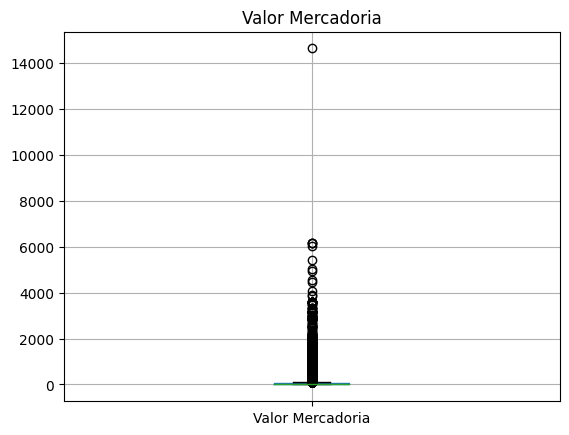

In [15]:
pacotes_outubro_entregue.boxplot(column=['Valor Mercadoria'])
plt.title('Valor Mercadoria')
plt.show()

O grafico de bloxplot nos mostra a distribuição dos valores, possuem outliers, porém são "falsos outlier's" por os valores de cada produto são diferente. Por isso irei substituir os missings pela media dos valores, porque a media dos valores se comportam melhores em caso que possuem outliers.

In [16]:
# Tratando os valores faltantes com as medias

media_valor_mercadoria = pacotes_outubro_entregue['Valor Mercadoria'].median()

# substituindo os valores faltantes pela media dos valores

pacotes_outubro_entregue['Valor Mercadoria'].fillna(media_valor_mercadoria, inplace=True)

#validando a alteração

pacotes_outubro_entregue.isnull().sum()

<ipython-input-16-bc4f6eedc21a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pacotes_outubro_entregue['Valor Mercadoria'].fillna(media_valor_mercadoria, inplace=True)


Número de pedido JMS                    0
Franqueado                              0
Base de entrega                         0
Responsável pela entrega                0
Marca de assinatura                     0
PDD de Entrega                          0
Horário da entrega                      0
Destino                                50
Valor Mercadoria                        0
CEP destino                             0
Endereço detalhado do destinatário    335
dtype: int64

Nessa etapa está faltando apenas tratar os valores dos atributos ' Destino ' e também 'Endereço detalhado do destinatário'. Para realziar esse tratamento, vou utilizar o atributo CEP para fazer a busca do endereço completo na API e retornar somente com a Cidade nesse primeito tratamento, pois no posterior, irei buscar o nome da rua.

In [67]:
#Função que consome a API para usar  o CEP e obter a informação que preciso

def buscar_destino_api(cep):

  url = f"https://viacep.com.br/ws/{cep}/json/"
  response = requests.get(url)
  data = response.json()
  return data['localidade']

# Se for necessário mais informações, basta descomentar
  '''if "erro" not in data:
        return {
            "cep": data["cep"],
            "logradouro": data["logradouro"],
            "bairro": data["bairro"],
            "cidade": data["localidade"],
            "estado": data["uf"]
        }
    else:
        return None'''

In [68]:
#validando o uso da API e da função em conjunto
buscar_destino_api('25585152')

'São João de Meriti'

AGora irei identificar todos os missings da coluna 'Destino' e identificados com o index e instanciar tudo isso na variavel "nan_indices", que utilizar mais a frente em um FOR.

In [66]:
# identificando os valores NaN da coluna ' Destino'
nan_indices = pacotes_outubro_entregue[pacotes_outubro_entregue['Destino'].isna()].index

Abaixo irei fazer um loop que irá:
- Percorrer os valores filtrados (indices),
- Exibir o cep que está sendo pesquisado
- prencher a função "busca_destino_api()"
- Exibir a resposta da pesquisa
- Salvar no dataframe ,substituindo o missings da linha
- Irá "dormir" por 5 seg ( Essa foi a forma que conseguir de não ter meu ip bloqueado por imundação de solicitações)
- E pula para a proxima pesquisa.
Obs: Se encontrar algum erro, ele simplesmente ignora e vai para o proximo.

In [69]:
# Loop para percorrer os valores filtrados (indices) e preencher com o resultado da função acima

for index in nan_indices:
  try:
    cep_value = pacotes_outubro_entregue.loc[index,'CEP destino']
    print('CEP destino: ', cep_value)
    destino = buscar_destino_api(str(cep_value))
    print('Cidade: ', destino)
    pacotes_outubro_entregue.at[index, "Destino"] = destino
    time.sleep(5)

  except Exception:
    continue

CEP destino:  24931740
Cidade:  Maricá
CEP destino:  21061140
Cidade:  Rio de Janeiro
CEP destino:  23032450
Cidade:  Rio de Janeiro
CEP destino:  21046430
Cidade:  Rio de Janeiro
CEP destino:  24753000
Cidade:  São Gonçalo
CEP destino:  24753000
Cidade:  São Gonçalo
CEP destino:  21920316
Cidade:  Rio de Janeiro
CEP destino:  21921600
Cidade:  Rio de Janeiro
CEP destino:  23826425
Cidade:  Itaguaí
CEP destino:  24445590
Cidade:  São Gonçalo
CEP destino:  24711000
Cidade:  São Gonçalo
CEP destino:  24731060
Cidade:  São Gonçalo
CEP destino:  24932265
Cidade:  Maricá
CEP destino:  24932265
Cidade:  Maricá
CEP destino:  24932265
Cidade:  Maricá
CEP destino:  24932265
Cidade:  Maricá
CEP destino:  22745004
Cidade:  Rio de Janeiro
CEP destino:  22745004
Cidade:  Rio de Janeiro
CEP destino:  22745004
Cidade:  Rio de Janeiro
CEP destino:  22745004
Cidade:  Rio de Janeiro
CEP destino:  22745004
Cidade:  Rio de Janeiro
CEP destino:  22745004
Cidade:  Rio de Janeiro
CEP destino:  22773060
Cidad

In [70]:
pacotes_outubro_entregue.isnull().sum()

Número de pedido JMS                    0
Franqueado                              0
Base de entrega                         0
Responsável pela entrega                0
Marca de assinatura                     0
PDD de Entrega                          0
Horário da entrega                      0
Destino                                 0
Valor Mercadoria                        0
CEP destino                             0
Endereço detalhado do destinatário    335
dtype: int64

Apos a execução da celula, todos os desino que está faltando, foram preenchido com os destino correto.
O Proximo passo é fazer o mesmo procedimento, mas agora para a coluna "Endereço detalhado do destinatário" , onde contém 335 missings.

Para essa consulta, precisei :

- Instanciar as linhas com missings da "Endereço detalhado do destinatário"
- Percorrer o FOR e agora retornar apenas o Logadouro , que seria o nome da rua.

In [84]:
# Identificandos os missings da coluna 'Endedreço detalhado do destinatário'
nan_indices = pacotes_outubro_entregue[pacotes_outubro_entregue['Endereço detalhado do destinatário'].isna()].index

In [85]:
def buscar_endereco_api(cep):

  url = f"https://viacep.com.br/ws/{cep}/json/"
  response = requests.get(url)
  data = response.json()
  return data['logradouro']

# Se for necessário mais informações, basta descomentar
  '''if "erro" not in data:
        return {
            "cep": data["cep"],
            "logradouro": data["logradouro"],
            "bairro": data["bairro"],
            "cidade": data["localidade"],
            "estado": data["uf"]
        }
    else:
        return None'''

In [86]:
buscar_endereco_api('25585150')

'Rua Ana Maria de Queiroz Matoso'

In [87]:
for index in nan_indices:
  try:
    cep_value_endereco = pacotes_outubro_entregue.loc[index,'CEP destino']
    print('CEP destino: ', cep_value_endereco)
    endereco = buscar_endereco_api(str(cep_value_endereco))
    print('logradouro: ', endereco)
    pacotes_outubro_entregue.at[index,'Endereço detalhado do destinatário'] = endereco
    time.sleep(5)

  except Exception:
    continue

CEP destino:  22783375
logradouro:  Rua Mario Alberto Padilha
CEP destino:  24903810
logradouro:  Avenida Roberto Silveira
CEP destino:  21550510
logradouro:  Rua Teresa Santos
CEP destino:  24220380
logradouro:  Rua Geraldo Martins
CEP destino:  24360480
logradouro:  Rua Eurico Batista
CEP destino:  23092631
logradouro:  Rua Oreco
CEP destino:  20745250
logradouro:  Rua Paraná
CEP destino:  23515680
logradouro:  Rua Nestor
CEP destino:  22240003
logradouro:  Rua das Laranjeiras
CEP destino:  24931485
logradouro:  Rua São João
CEP destino:  21510102
logradouro:  Avenida dos Italianos
CEP destino:  22420020
logradouro:  Rua Farme de Amoedo
CEP destino:  20751390
logradouro:  Rua Paranapiacaba
CEP destino:  21911070
logradouro:  Rua Curuca
CEP destino:  22071055
logradouro:  Rua Professor Gastão Bahiana
CEP destino:  24474005
logradouro:  Estrada Trindade
CEP destino:  24421300
logradouro:  Rua José Lourenço Azevedo
CEP destino:  24914365
logradouro:  Rua Maria José dos Santos
CEP destin

In [88]:
pacotes_outubro_entregue.isna().sum()

Número de pedido JMS                  0
Franqueado                            0
Base de entrega                       0
Responsável pela entrega              0
Marca de assinatura                   0
PDD de Entrega                        0
Horário da entrega                    0
Destino                               0
Valor Mercadoria                      0
CEP destino                           0
Endereço detalhado do destinatário    0
dtype: int64

<Axes: >

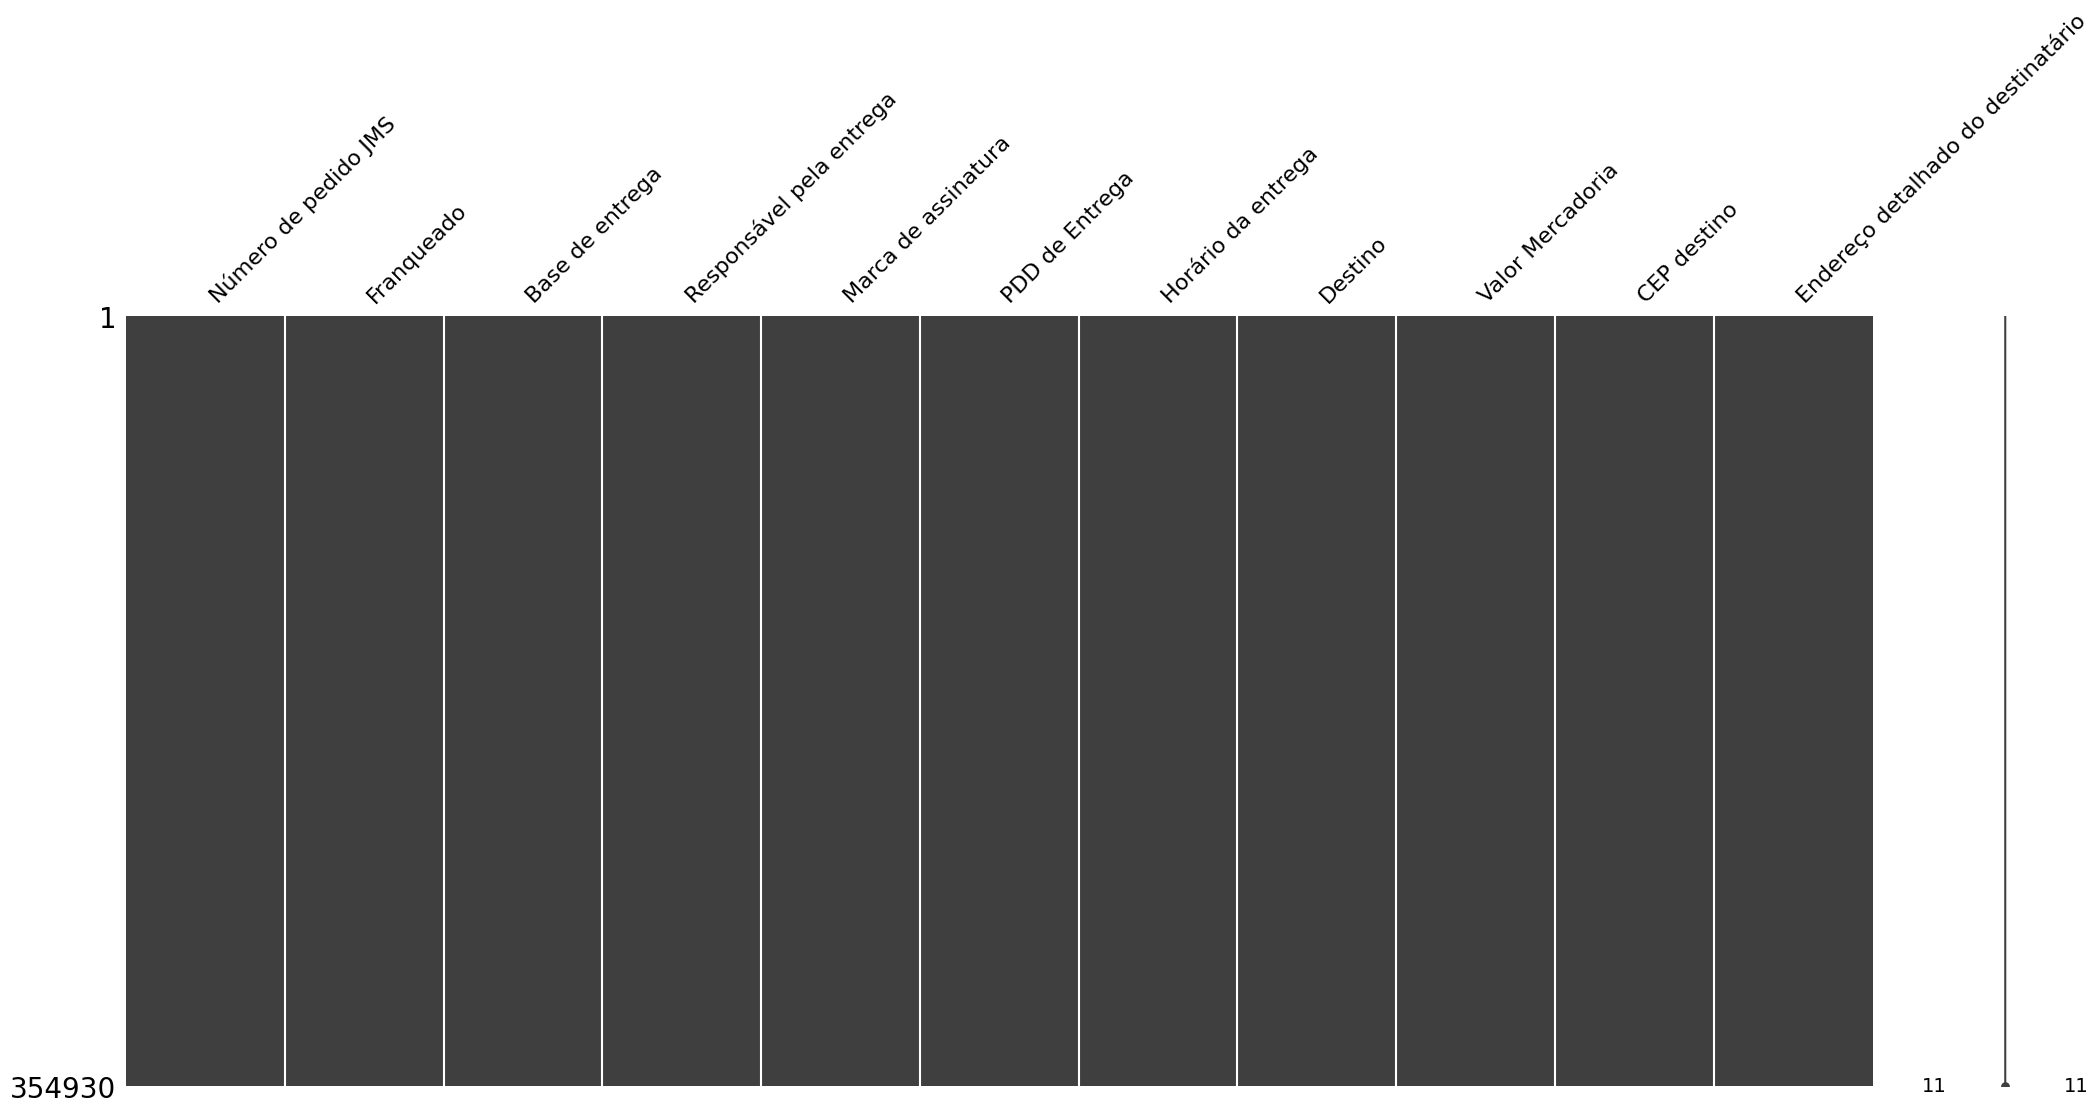

In [94]:
ms.matrix(pacotes_outubro_entregue)

Nesse momento possuo um dataframe totalmente sem nenhum missings aparente.
Para a analise exploratório ficar mais facil de entender, irei substituir as siglas pelos nome que elas possuem com os seguintes passos:

- Verificar a distruição dos valores com a função .unique()

- Criar uma dicionario com os nomes referente as siglas

- Criar uma nova coluna com o nome "nome_base" e utilizar a função lambda para adicionar no dataframe

In [97]:
pacotes_outubro_entregue['PDD de Entrega'].unique()

array(['CD RIO 004', 'CD RIO 008', 'CD RIO 001', 'CD RIO 002',
       'CD RIO 005', 'CD SGC 002', 'CD RIO 006', 'CD RIO 003',
       'CD RIO 007', 'CD RIO 009', 'CD SGC 001'], dtype=object)

In [98]:
# Criando um dicionario vinculando o codigo
nome_base = {
    "CD RIO 002": "RAMOS",
    "CD RIO 003": "BENFICA",
    "CD RIO 001": "CURICICA",
    "CD RIO 007": "VARGEM PEQUENA",
    "CD RIO 004": "CAMPO GRANDE I",
    "CD RIO 005": "CAMPINHO",
    "CD SGC 001": "COLUBANDE",
    "CD RIO 006": "CAMPO GRANDE II",
    "CD SGC 002": "NEVES",
    "CD RIO 008": "CASCADURA",
    "CD RIO 009": "SAO CRISTOVAO"
}


In [99]:
nome_base

{'CD RIO 002': 'RAMOS',
 'CD RIO 003': 'BENFICA',
 'CD RIO 001': 'CURICICA',
 'CD RIO 007': 'VARGEM PEQUENA',
 'CD RIO 004': 'CAMPO GRANDE I',
 'CD RIO 005': 'CAMPINHO',
 'CD SGC 001': 'COLUBANDE',
 'CD RIO 006': 'CAMPO GRANDE II',
 'CD SGC 002': 'NEVES',
 'CD RIO 008': 'CASCADURA',
 'CD RIO 009': 'SAO CRISTOVAO'}

In [100]:
# Cria um colunae associando os nome das bases as siglas

pacotes_outubro_entregue['nome_base'] = pacotes_outubro_entregue.apply(lambda row: nome_base[row["Base de entrega"]], axis=1)

<ipython-input-100-977db8cd9072>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pacotes_outubro_entregue['nome_base'] = pacotes_outubro_entregue.apply(lambda row: nome_base[row["Base de entrega"]], axis=1)


In [101]:
pacotes_outubro_entregue.head()

,Número de pedido JMS,Franqueado,Base de entrega,Responsável pela entrega,Marca de assinatura,PDD de Entrega,Horário da entrega,Destino,Valor Mercadoria,CEP destino,Endereço detalhado do destinatário,nome_base
0,888000259443753-000,NP RIO 02,CD RIO 004,CARLOS EDUARDO SOARES DA SILVA,Recebimento com assinatura normal,CD RIO 004,2023-10-15 18:48:53,Rio de Janeiro,476.9,23071570,"Rua Gutman BichoRua Gutman Bicho, 72, Fundos",CAMPO GRANDE I
1,888000260356793-000,NP RIO 02,CD RIO 008,RAFAEL SANTOS PINTO,Recebimento com assinatura normal,CD RIO 008,2023-10-15 13:36:15,Rio de Janeiro,4.6,20740380,.Rua Torres de Oliveira 235,CASCADURA
2,888000269117351-000,NP RIO 02,CD RIO 004,CAMILA AUGUSTO DE OLIVEIRA RODRIGUES,Recebimento com assinatura normal,CD RIO 004,2023-10-15 17:09:57,Rio de Janeiro,114.8,21810260,"Rua Simão CristinoRua Simão Cristino, 461, Casa 3",CAMPO GRANDE I
3,888000269896511-000,NP RIO 02,CD RIO 008,RAFAEL SANTOS PINTO,Recebimento com assinatura normal,CD RIO 008,2023-10-15 13:48:37,Rio de Janeiro,32.5,20740323,.Rua clarimundo de melo 446 bl1 apt 603,CASCADURA
4,888000272767315-000,NP RIO 02,CD RIO 004,EVERTON NOLASCO DA SILVA,Recebimento com assinatura normal,CD RIO 004,2023-10-15 23:56:14,Rio de Janeiro,26.9,21853002,.Rua Pitanga do Gericinó 11,CAMPO GRANDE I


In [102]:
#Salvando o dataframe limpo em um csv
pacotes_outubro_entregue.to_csv('pacotes_entregues.csv')

#3. Analise exploratoria

In [104]:
pacotes_outubro_entregue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354930 entries, 0 to 355861
Data columns (total 12 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Número de pedido JMS                354930 non-null  object 
 1   Franqueado                          354930 non-null  object 
 2   Base de entrega                     354930 non-null  object 
 3   Responsável pela entrega            354930 non-null  object 
 4   Marca de assinatura                 354930 non-null  object 
 5   PDD de Entrega                      354930 non-null  object 
 6   Horário da entrega                  354930 non-null  object 
 7   Destino                             354930 non-null  object 
 8   Valor Mercadoria                    354930 non-null  float64
 9   CEP destino                         354930 non-null  int64  
 10  Endereço detalhado do destinatário  354930 non-null  object 
 11  nome_base                 

In [106]:
pacotes_nome_base = pacotes_outubro_entregue['nome_base'].value_counts()

In [108]:
pacotes_nome_base

RAMOS              66411
BENFICA            58201
CURICICA           46942
VARGEM PEQUENA     39094
CAMPO GRANDE I     34569
CAMPINHO           32877
COLUBANDE          24425
CAMPO GRANDE II    22398
NEVES              18806
CASCADURA          11166
SAO CRISTOVAO         41
Name: nome_base, dtype: int64

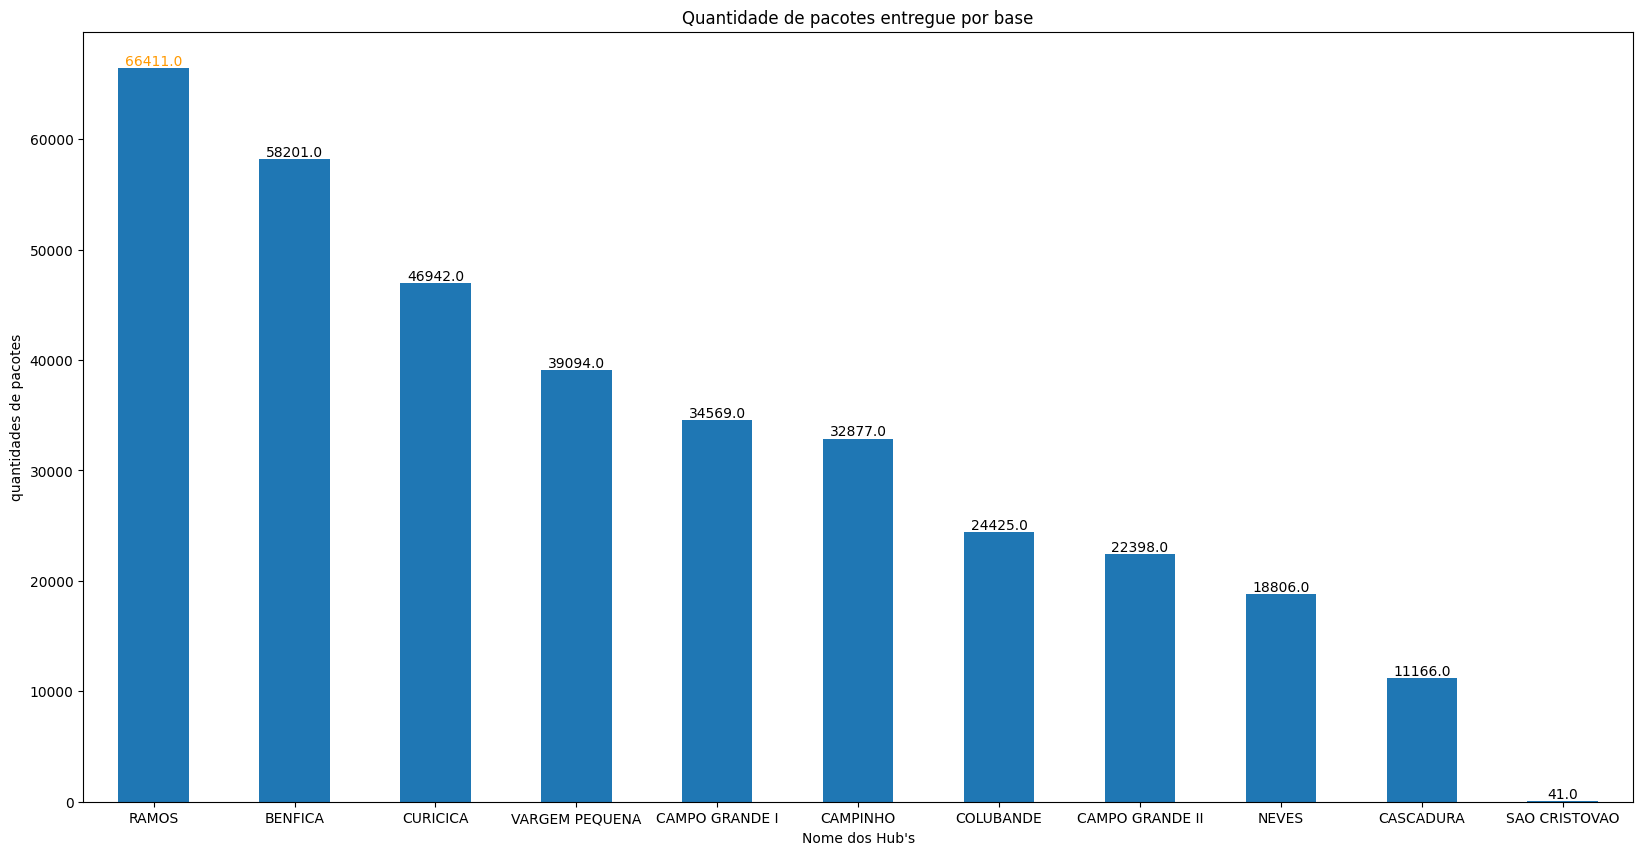

In [109]:
# Função pyplot.bar()
fig , ax = plt.subplots(figsize=(20,10))

# plota o gráfico de barras
pacotes_nome_base.plot(kind='bar', legend=False)
plt.title('Quantidade de pacotes entregue por base')
plt.xlabel("Nome dos Hub's")
plt.ylabel('quantidades de pacotes')

# Acrescenta os valores sobre as barras

b1 = ax.bar_label(ax.containers[0], fmt="%.1f")
b1[0].set_color("#ff9900")
# Função para deitar o nome do grafico
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
#plt.tight_layout()

# Exibe o gráfico
plt.show()

Pode-se observar que a localidade de Ramos foi a que teve maior numero de pacotes entregues. Totalizando 66411 pacotes. seguido por BENFICA 58201 e por Curicica 46942.

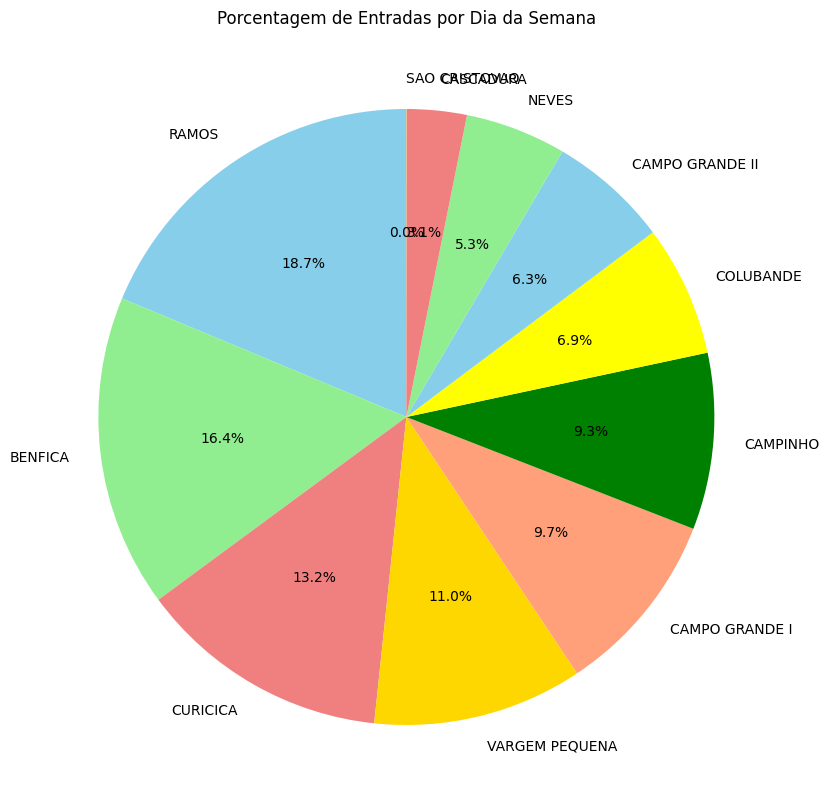

In [164]:
plt.figure(figsize=(20, 10))
pacotes_nome_base.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False, colors=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightsalmon','green','yellow'])
plt.title('Porcentagem de entrega por Galpão')
plt.xlabel('')
plt.ylabel('')  # Adicionar legenda
plt.show()

A Proxima etapa é verificar qual dia da semana houve o maior numero de entrega.
Para fazer essa consulta, vou precisar voltar a fazer o pré-processamento da coluna, da seguinte forma:

- Transformar o atributo 'Horário da entrega' no tipo datatime

- Criar uma nova coluna com a data e hora formatada

- Adicionar uma nova coluna especificando o dia da semana e definindo o idioma PT-BR

- instanciar uma variavel com a contagem dos dias

- Plotar uma grafico de barras.

In [116]:
# Transformando a coluna ' Horário da entrega' para o tipo datetime

pacotes_outubro_entregue['Horário da entrega'] = pd.to_datetime(pacotes_outubro_entregue['Horário da entrega'])


In [117]:
#Criando uma nova coluna com a data e hora formatada

pacotes_outubro_entregue['data_hora_formatada'] = pacotes_outubro_entregue['Horário da entrega'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [132]:
# Definir o locale para português do Brasil
#locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')

# Adicionando uma nova coluna especificando o dia da semana e definindo pelo idioma PT-BR
pacotes_outubro_entregue['dia_da_semana'] = pacotes_outubro_entregue['Horário da entrega'].dt.day_name()#(locale='pt_BR.UTF-8')


In [137]:
pacotes_outubro_entregue['dia_da_semana'].unique()

array(['Sunday', 'Tuesday', 'Monday', 'Wednesday', 'Saturday', 'Friday',
       'Thursday'], dtype=object)

In [139]:
pacotes_dias_semanas = pacotes_outubro_entregue['dia_da_semana'].value_counts()

In [140]:
pacotes_dias_semanas

Monday       73252
Friday       63377
Saturday     55793
Wednesday    54643
Tuesday      47706
Thursday     40664
Sunday       19495
Name: dia_da_semana, dtype: int64

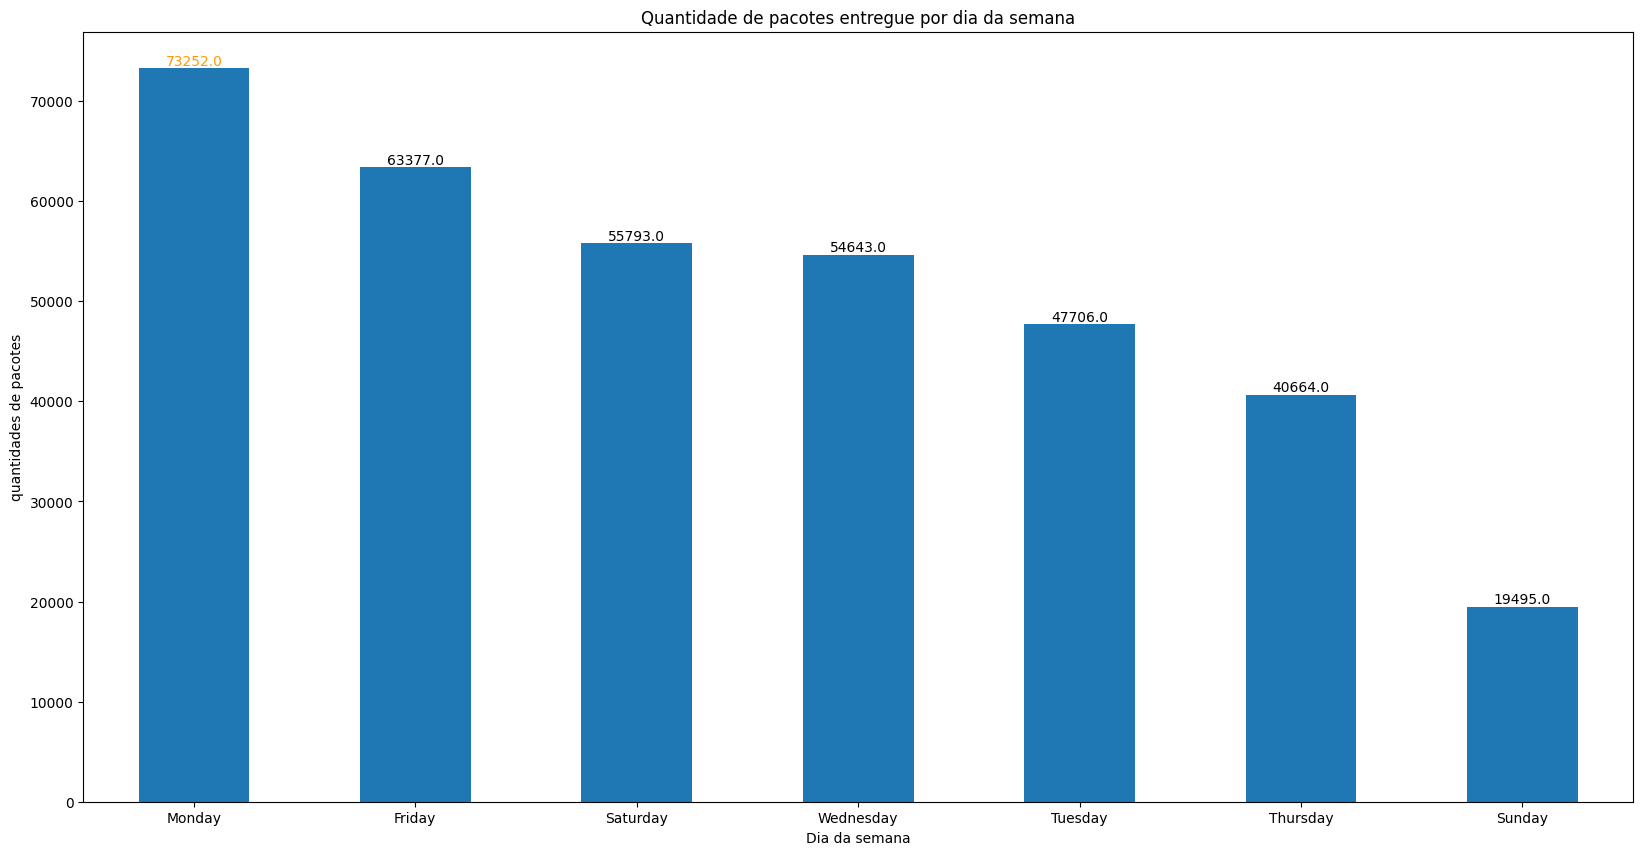

In [165]:
# Função pyplot.bar()
fig , ax = plt.subplots(figsize=(20,10))

# plota o gráfico de barras
pacotes_dias_semanas.plot(kind='bar', legend=False)
plt.title('Quantidade de pacotes entregue por dia da semana')
plt.xlabel("Dia da semana")
plt.ylabel('quantidades de pacotes')

# Acrescenta os valores sobre as barras

b1 = ax.bar_label(ax.containers[0], fmt="%.1f")
b1[0].set_color("#ff9900")
# Função para deitar o nome do grafico
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
#plt.tight_layout()

# Exibe o gráfico
plt.show()